# Vpliv izobrazbe na brezposelnost

Podatki: po-statisticnah-regijah_izobrazba.csv, zaposleni/prebivalstvo_po_statusu_akitivnosti.csv 

In [698]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import os

directory = "structured_data/"

data_dict = {}

for filename in os.listdir(directory):
    if filename.endswith(".csv"):
        print("Reading: " + filename)
        name = os.path.splitext(filename)[0]
        filepath = os.path.join(directory, filename)
        df = pd.read_csv(filepath)
        data_dict[name] = df


Reading: po-obcinah_izobrazba.csv
Reading: po-obcinah_spol.csv
Reading: po-obcinah_starost.csv
Reading: po-obcinah_trajanje-brezposelnosti.csv
Reading: po-statisticnah-regijah_izobrazba.csv
Reading: po-statisticnah-regijah_spol.csv
Reading: po-statisticnah-regijah_starost.csv
Reading: po-statisticnah-regijah_trajanje-brezposelnosti.csv
Reading: po-uradih-za-delo_izobrazba.csv
Reading: po-uradih-za-delo_spol.csv
Reading: po-uradih-za-delo_starost.csv
Reading: po-uradih-za-delo_trajanje-brezposelnosti.csv
Reading: stopnje_obcine.csv


## Brezposlenost po izobrazbi

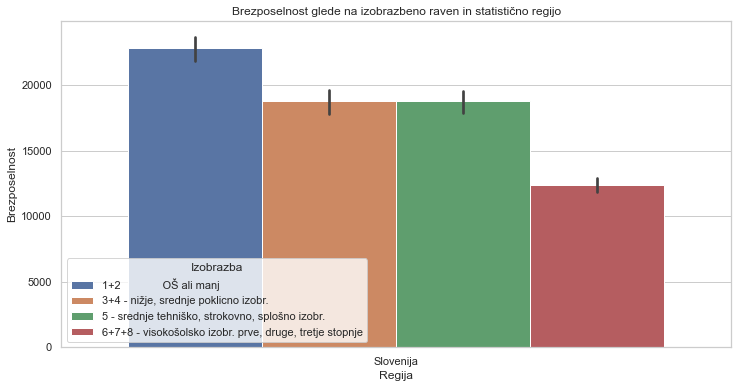

In [699]:
data = data_dict['po-statisticnah-regijah_izobrazba']

data = data.dropna()

data.columns = data.columns.str.strip()

data = data.rename(columns={
    'Kohezijska / Statistična regija': 'Region',
    'Skupaj': 'Total'
})

data = data.query("Region in ['Slovenija']")

melted_data = pd.melt(data, id_vars=['Region', 'year'], value_vars=['1+2              OŠ ali manj', '3+4 - nižje, srednje poklicno izobr.', '5 - srednje tehniško, strokovno, splošno izobr.', '6+7+8 - visokošolsko izobr. prve, druge, tretje stopnje'], var_name='Izobrazba', value_name='Unemployment')

sns.set(style="whitegrid")

fig, ax = plt.subplots(figsize=(12, 6))
sns.barplot(data=melted_data, x='Region', y='Unemployment', hue='Izobrazba', ax=ax)

ax.set_title('Brezposelnost glede na izobrazbeno raven in statistično regijo')
ax.set_xlabel('Regija')
ax.set_ylabel('Brezposelnost')

plt.show()


Iz grafa lahko razberemo da je brezposelnost visja med osebami z nizjo izobrazbo. Vendar nam to ne pove da je vzrok za visjo brezposelnost definitivno nizka izobrazba. Vzrokov je lahko vec. Lahko je delez oseb z nizjo izobrazbo vecji kot oseb z visjo izobrazbo. Lahko je tudi obratno, da je vzrok za nizko izobrazbo brezposelnost.
Zanimivo, pa je v letu 2022 imela 5. stopnja izobrazbe visjo brezposelnost kot 3. + 4. stopnja izobrazbe.  

## Brezposelnost po izobrazbi (v odstotkih)

Da lahko zgornji grafikon pretvorimo v odstotke potrebujemo podatke o izobrazbi vseh zaposlenih in brezposelnih slovenskih drzavljanov.

In [700]:
zaposleni = pd.read_csv('structured_data/zaposleni/prebivalstvo_po_statusu_akitivnosti.csv', sep=',', encoding="Windows-1252")
zaposleni = zaposleni.dropna()
zaposleni.head()

,SPOL,IZOBRAZBA,2011 Zaposleni,2011 Brezposelni,2012 Zaposleni,2012 Brezposelni,2013 Zaposleni,2013 Brezposelni,2014 Zaposleni,2014 Brezposelni,...,2018 Zaposleni,2018 Brezposelni,2019 Zaposleni,2019 Brezposelni,2020 Zaposleni,2020 Brezposelni,2021 Zaposleni,2021 Brezposelni,2022 Zaposleni,2022 Brezposelni
0,Spol - SKUPAJ,Izobrazba - SKUPAJ,835776,108793,824636,114166,803082,119307,800018,125900,...,875484,87657,899776,81104,911111,79636,917009,92883,930965,72568
1,Spol - SKUPAJ,Osnovnošolska ali manj - Skupaj,121766,30186,107067,29816,95233,28009,90280,28049,...,77109,18804,76347,17482,76812,17068,80951,18070,79937,15268
2,Spol - SKUPAJ,Brez izobrazbe,105,23,80,51,72,18,67,13,...,68,5,71,4,152,5,163,5,138,4
3,Spol - SKUPAJ,Nepopolna osnovnošolska,13413,154,10806,817,8753,128,8000,252,...,5657,731,5610,730,6213,797,7218,945,7471,979
4,Spol - SKUPAJ,Osnovnošolska,108248,30009,96181,28948,86408,27863,82213,27784,...,71384,18068,70666,16748,70447,16266,73570,17120,72328,14285


Naletimo na problem: grupiranje nivojev izobrazbe se razlikuje med podatkovnima viroma. Zato moramo nivoje izobrazbe v podatkih o zaposlenih pretvoriti v nivoje izobrazbe v podatkih o brezposelnih.

In [701]:
education_mapping = {
    'Osnovnošolska ali manj - Skupaj': '1+2 OŠ ali manj',
    'Brez izobrazbe': '1+2 OŠ ali manj',
    'Nepopolna osnovnošolska': '1+2 OŠ ali manj',
    'Osnovnošolska': '1+2 OŠ ali manj',
    'Srednješolska - Skupaj': '3+4 - nižje, srednje poklicno izobr.',
    'Nižja poklicna': '3+4 - nižje, srednje poklicno izobr.',
    'Srednja poklicna': '3+4 - nižje, srednje poklicno izobr.',
    'Srednja strokovna, srednja splošna': '5 - srednje tehniško, strokovno, splošno izobr.',
    'Višješolska, visokošolska - Skupaj': '6+7+8 - visokošolsko izobr. prve, druge, tretje stopnje',
    'Višješolska (prejšnja), višja strokovna': '6+7+8 - visokošolsko izobr. prve, druge, tretje stopnje',
    'Visokošolska 1. stopnje, visokošolska strokovna (prejšnja) ipd.': '6+7+8 - visokošolsko izobr. prve, druge, tretje stopnje',
    'Visokošolska 2. stopnje, visokošolska univerzitetna (prejšnja) ipd.': '6+7+8 - visokošolsko izobr. prve, druge, tretje stopnje',
    'Magisterij znanosti ipd.': '6+7+8 - visokošolsko izobr. prve, druge, tretje stopnje',
    'Doktorat znanosti': '6+7+8 - visokošolsko izobr. prve, druge, tretje stopnje'
}

zaposleni['IZOBRAZBA'] = zaposleni['IZOBRAZBA'].map(education_mapping)
zaposleni.head(20)

,SPOL,IZOBRAZBA,2011 Zaposleni,2011 Brezposelni,2012 Zaposleni,2012 Brezposelni,2013 Zaposleni,2013 Brezposelni,2014 Zaposleni,2014 Brezposelni,...,2018 Zaposleni,2018 Brezposelni,2019 Zaposleni,2019 Brezposelni,2020 Zaposleni,2020 Brezposelni,2021 Zaposleni,2021 Brezposelni,2022 Zaposleni,2022 Brezposelni
0,Spol - SKUPAJ,NaN,835776,108793,824636,114166,803082,119307,800018,125900,...,875484,87657,899776,81104,911111,79636,917009,92883,930965,72568
1,Spol - SKUPAJ,1+2 OŠ ali manj,121766,30186,107067,29816,95233,28009,90280,28049,...,77109,18804,76347,17482,76812,17068,80951,18070,79937,15268
2,Spol - SKUPAJ,1+2 OŠ ali manj,105,23,80,51,72,18,67,13,...,68,5,71,4,152,5,163,5,138,4
3,Spol - SKUPAJ,1+2 OŠ ali manj,13413,154,10806,817,8753,128,8000,252,...,5657,731,5610,730,6213,797,7218,945,7471,979
4,Spol - SKUPAJ,1+2 OŠ ali manj,108248,30009,96181,28948,86408,27863,82213,27784,...,71384,18068,70666,16748,70447,16266,73570,17120,72328,14285
5,Spol - SKUPAJ,"3+4 - nižje, srednje poklicno izobr.",488562,65609,479805,68323,469236,73241,461369,76581,...,495011,51703,508315,48126,511725,47829,507689,56976,512125,43610
6,Spol - SKUPAJ,"3+4 - nižje, srednje poklicno izobr.",6491,2427,7088,2385,7312,2889,7865,3065,...,11283,2675,12778,2476,13644,2513,14314,2732,14764,2242
7,Spol - SKUPAJ,"3+4 - nižje, srednje poklicno izobr.",202205,28627,197279,30059,187269,32332,183307,32136,...,184322,21209,188375,19594,189588,19466,188366,22421,187506,17447
8,Spol - SKUPAJ,"5 - srednje tehniško, strokovno, splošno izobr.",279866,34555,275438,35879,274655,38020,270197,41380,...,299406,27819,307162,26056,308493,25850,305009,31823,309855,23921
9,Spol - SKUPAJ,"6+7+8 - visokošolsko izobr. prve, druge, tretj...",225448,12998,237764,16027,238613,18057,248369,21270,...,303364,17150,315114,15496,322574,14739,328369,17837,338903,13690


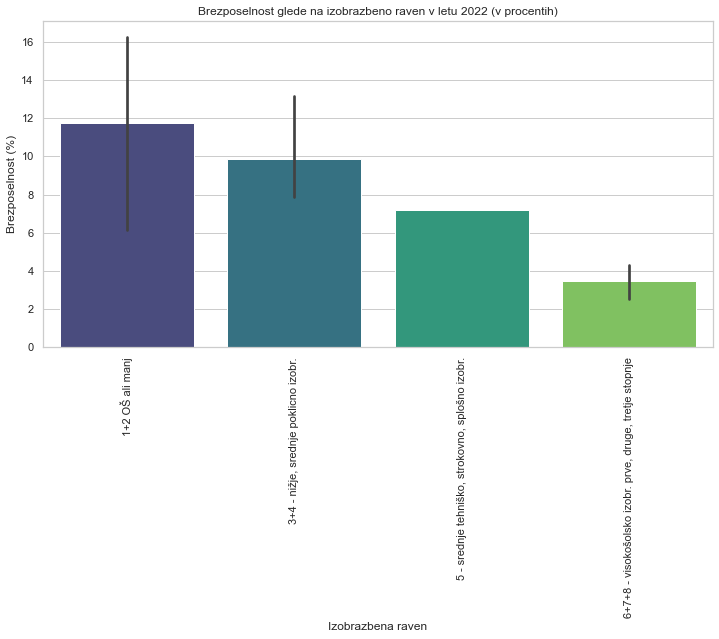

In [702]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

zaposleni['2022 Unemployment Rate'] = (zaposleni['2022 Brezposelni'] / (zaposleni['2022 Zaposleni'] + zaposleni['2022 Brezposelni'])) * 100

zaposleni_filtered = zaposleni[zaposleni['IZOBRAZBA'].notna()]

melted_data = zaposleni_filtered[['IZOBRAZBA', '2022 Unemployment Rate']].copy()

sns.set(style="whitegrid")

fig, ax = plt.subplots(figsize=(12, 6))
sns.barplot(data=melted_data, x='IZOBRAZBA', y='2022 Unemployment Rate', ax=ax, palette='viridis')

ax.set_title('Brezposelnost glede na izobrazbeno raven v letu 2022 (v procentih)')
ax.set_xlabel('Izobrazbena raven')
ax.set_ylabel('Brezposelnost (%)')
plt.xticks(rotation=90)

plt.show()


Z grafom brezposlenosti v procentih dobimo boljsi vpogled v brezposelnost po izobrazbi. Definitivno vidimo da je vec brezposlenih nizje izobrazenih posameznikov. Vidimo tudi, da je procentualno vec brezposlenih s 3+ 4 stopnjo izobrazbe kot s 5. stopnjo izobrazbe. 

## "Correlation does not mean causation"

Korelacija med dvema spremenljivkama ne pomeni nujno vzročne povezave med njima. Kljub temu, da lahko opazimo močno povezanost med spremenljivkama, ne smemo sklepati, da ena spremenljivka povzroča drugo. Niti ne smemo sklepati, da je vzročna povezava enosmerna, saj je lahko tudi obratna.

Vzročnost je kompleksno področje, saj lahko vpliva več dejavnikov in skritih spremenljivk, ki niso vidne na prvi pogled, še posebej pri problematiki kot je brezposelnost. Ko se soočamo z rezultati, ki kažejo na korelacijo med spremenljivkama, je pomembno biti previden in upoštevati druge možne razlage za to povezavo.
Vprasanje korelacije lahko raziskujemo z razlicnimi pristopi (Trendna analiza, Eksperimentalni pristop, Analiza instrumentalnih spremenljivk, Kausalna inferenca z uporabo strojnega učenja...)

<ipython-input-703-e02ebb9f3167>:7: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  zaposleni_grouped = zaposleni_filtered.groupby('IZOBRAZBA').sum()


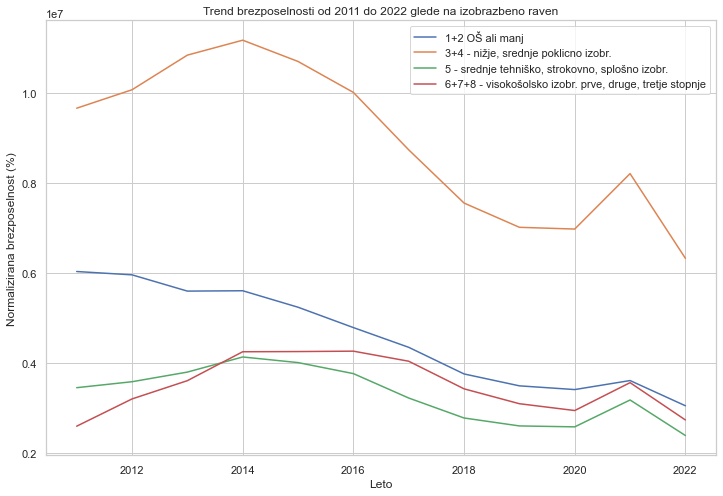

In [703]:
import matplotlib.pyplot as plt

zaposleni_filtered = zaposleni[zaposleni['IZOBRAZBA'].notna()]

years = list(range(2011, 2023))

zaposleni_grouped = zaposleni_filtered.groupby('IZOBRAZBA').sum()

for year in years:
    zaposleni_grouped[f'{year} Unemployment Rate'] = (zaposleni_grouped[f'{year} Brezposelni'] / 
                                                      zaposleni_grouped[f'{year} Zaposleni']) * 100

for year in years:
    zaposleni_grouped[f'{year} Normalized Unemployment Rate'] = (zaposleni_grouped[f'{year} Brezposelni'] / 
                                                                 zaposleni_grouped[f'{year} Zaposleni'] + 
                                                                 zaposleni_grouped[f'{year} Brezposelni']) * 100

education_levels = zaposleni_filtered['IZOBRAZBA'].unique()

fig, ax = plt.subplots(figsize=(12, 8))

for edu_level in education_levels:
    normalized_unemployment_rates = [zaposleni_grouped.loc[edu_level, f'{year} Normalized Unemployment Rate'] for year in years]
    plt.plot(years, normalized_unemployment_rates, label=edu_level)

plt.title('Trend brezposelnosti od 2011 do 2022 glede na izobrazbeno raven')
plt.xlabel('Leto')
plt.ylabel('Normalizirana brezposelnost (%)')
plt.legend()
plt.show()


Cilj zgornjega grafa je analizirati spremembe v brezposelnosti med različnimi izobrazbenimi ravni in ugotoviti morebitne vzorce ali trende.

Grafično prikazane linije predstavljajo izobrazbene ravni, medtem ko je na y-osi prikazana normalizirana brezposelnost v odstotkih. Normalizacija je bila izvedena z upoštevanjem celotnega števila ljudi v posamezni izobrazbeni ravni, kar nam omogoča primerjavo relativnih sprememb v brezposelnosti med izobrazbenimi ravnmi.

Spremljali smo trende skozi čas in opazovali, kako se je brezposelnost spreminjala pri različnih izobrazbenih ravneh. Na ta način smo želeli ugotoviti, ali obstaja povezava med izobrazbeno ravnjo in stopnjo brezposelnosti ter prepoznati morebitne vzorce.

Vendar pa je pomembno opozoriti, da ta graf sam po sebi ne zagotavlja dokončnih dokazov o vzročni povezavi med izobrazbeno ravnjo in brezposelnostjo. Za pridobitev popolnejše slike je treba upoštevati tudi druge dejavnike, kot so gospodarski pogoji, demografske značilnosti in rezultate drugih raziskav.